In [1]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
np.set_printoptions(precision=4, suppress=True)

In [2]:
import numpy as np
import pandas as pd

## 11.1 Date and Time Data Types and Tools
The Python standard library includes data types for date and time data, as well as calendar-related functionality. The `datetime`, `time`, and `calendar` modules are the main places to start. The `datetime.datetime` type, or simply datetime, is widely used:

In [3]:
from datetime import datetime
now = datetime.now()
now


datetime.datetime(2023, 11, 8, 8, 37, 30, 199890)

In [4]:
now.year, now.month, now.day

(2023, 11, 8)

`datetime` stores both the date and time down to the microsecond. `datetime.timedelta`, or simply `timedelta`, represents the temporal difference between two datetime objects:

In [5]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
#datetime(year, month, day[, hour[, minute[, second[, microsecond[, tzinfo]]]]])
delta


datetime.timedelta(days=926, seconds=56700)

In [6]:
delta.days

926

In [7]:

delta.seconds

56700

You can add (or subtract) a timedelta or multiple thereof to a datetime object to yield a new shifted object:

In [8]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)
#timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=0, weeks=0)



datetime.datetime(2011, 1, 19, 0, 0)

In [9]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

Table 11.1: Types in the datetime module
Type	|Description
|:-----------|:--------------------------------------------------|
date|	Store calendar date (year, month, day) using the Gregorian calendar
time	|Store time of day as hours, minutes, seconds, and microseconds
datetime|	Store both date and time
timedelta|	The difference between two datetime values (as days, seconds, and microseconds)
tzinfo|	Base type for storing time zone information

### Converting Between String and Datetime
You can format datetime objects and pandas Timestamp objects, which I’ll introduce later, as strings using str or the strftime method, passing a format specification:

Table 11.2: datetime format specification (ISO C89 compatible)
Type	|Description
|:-----|:---------------------------------------------------------------|
%Y|	Four-digit year
%y|	Two-digit year
%m|	Two-digit month [01, 12]
%d|	Two-digit day [01, 31]
%H|	Hour (24-hour clock) [00, 23]
%I|	Hour (12-hour clock) [01, 12]
%M|	Two-digit minute [00, 59]
%S|	Second [00, 61] (seconds 60, 61 account for leap seconds)
%f|	Microsecond as an integer, zero-padded (from 000000 to 999999)
%j|	Day of the year as a zero-padded integer (from 001 to 336)
%w|	Weekday as an integer [0 (Sunday), 6]
%u|	Weekday as an integer starting from 1, where 1 is Monday.
%U|	Week number of the year [00, 53]; Sunday is considered the first day of the week, and days before the first Sunday of the year are “week 0”
%W|	Week number of the year [00, 53]; Monday is considered the first day of the week, and days before the first Monday of the year are “week 0”
%z|	UTC time zone offset as +HHMM or -HHMM; empty if time zone naive
%Z|	Time zone name as a string, or empty string if no time zone
%F|	Shortcut for %Y-%m-%d (e.g., 2012-4-18)
%D|	Shortcut for %m/%d/%y (e.g., 04/18/12)

You can use many of the same format codes to convert strings to dates using `datetime.strptime` (but some codes, like %F, cannot be used):

In [10]:
stamp = datetime(2011, 1, 3)
str(stamp)


'2011-01-03 00:00:00'

In [11]:
stamp.strftime("%Y-%m-%d")

'2011-01-03'

In [12]:
value = "2011-01-03"
datetime.strptime(value, "%Y-%m-%d")


datetime.datetime(2011, 1, 3, 0, 0)

In [13]:
datestrs = ["7/6/2011", "8/6/2011"]
[datetime.strptime(x, "%m/%d/%Y") for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

The pandas.to_datetime method parses many different kinds of date representations. Standard date formats like ISO 8601 can be parsed quickly:

In [14]:
datestrs = ["2011-07-06 12:00:00", "2011-08-06 00:00:00"]
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

It also handles values that should be considered missing (None, empty string, etc.): `NaT` (Not a Time) is pandas’s null value for timestamp data.

In [15]:
datestrs + [None]

['2011-07-06 12:00:00', '2011-08-06 00:00:00', None]

In [16]:
idx = pd.to_datetime(datestrs + [None])
idx


DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [17]:
idx[2]


NaT

In [18]:
pd.isna(idx)

array([False, False,  True])

:::{.callout-warning}
`dateutil.parser` is a useful but imperfect tool. Notably, it will recognize some strings as dates that you might prefer that it didn’t; for example, "42" will be parsed as the year 2042 with today’s calendar date.

datetime objects also have a number of locale-specific formatting options for systems in other countries or languages. For example, the abbreviated month names will be different on German or French systems compared with English systems. See Table 11.3 for a listing.

Table 11.3: Locale-specific date formatting

Type	|Description
|:------|:--------------------------------------------------|
%a	|Abbreviated weekday name
%A	|Full weekday name
%b	|Abbreviated month name
%B	|Full month name
%c	|Full date and time (e.g., ‘Tue 01 May 2012 04:20:57 PM’)
%p	|Locale equivalent of AM or PM
%x	|Locale-appropriate formatted date (e.g., in the United States, May 1, 2012 yields ‘05/01/2012’)
%X	|Locale-appropriate time (e.g., ‘04:24:12 PM’)

# 11.2 Time Series Basics
A basic kind of time series object in pandas is a Series indexed by timestamps, which is often represented outside of pandas as Python strings or datetime objects:

In [19]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.standard_normal(6), index=dates)
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [20]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

Like other Series, arithmetic operations between differently indexed time series automatically align on the dates:

In [21]:
ts[::2]

2011-01-02   -0.204708
2011-01-07   -0.519439
2011-01-10    1.965781
dtype: float64

In [22]:
ts + ts[::2] # note the data are aligned by date

2011-01-02   -0.409415
2011-01-05         NaN
2011-01-07   -1.038877
2011-01-08         NaN
2011-01-10    3.931561
2011-01-12         NaN
dtype: float64

pandas stores timestamps using NumPy’s datetime64 data type at the nanosecond resolution:

In [23]:
ts.index.dtype #datetime64

dtype('<M8[ns]')

Scalar values from a DatetimeIndex are pandas `Timestamp` objects:

In [24]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

A `pandas.Timestamp` can be substituted most places where you would use a `datetime` object. The reverse is not true, however, because `pandas.Timestamp` can store nanosecond precision data, while datetime stores only up to microseconds. Additionally, `pandas.Timestamp` can store frequency information (if any) and understands how to do time zone conversions and other kinds of manipulations. More on both of these things later in Time Zone Handling.

### Indexing, Selection, Subsetting
Time series behaves like any other Series when you are indexing and selecting data based on the label:

In [25]:
stamp = ts.index[2]
ts[stamp]

-0.5194387150567381

In [26]:
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

As a convenience, you can also pass a string that is interpretable as a date:

In [27]:
ts["2011-01-10"]

1.9657805725027142

In [28]:
longer_ts = pd.Series(np.random.standard_normal(1000),
                      index=pd.date_range("2000-01-01", periods=1000))
longer_ts


2000-01-01    0.092908
2000-01-02    0.281746
2000-01-03    0.769023
2000-01-04    1.246435
2000-01-05    1.007189
                ...   
2002-09-22    0.930944
2002-09-23   -0.811676
2002-09-24   -1.830156
2002-09-25   -0.138730
2002-09-26    0.334088
Freq: D, Length: 1000, dtype: float64

In [29]:
longer_ts["2001"] # data of the year 2001

2001-01-01    1.599534
2001-01-02    0.474071
2001-01-03    0.151326
2001-01-04   -0.542173
2001-01-05   -0.475496
                ...   
2001-12-27    0.057874
2001-12-28   -0.433739
2001-12-29    0.092698
2001-12-30   -1.397820
2001-12-31    1.457823
Freq: D, Length: 365, dtype: float64

In [30]:
longer_ts["2001-05"] # data of year 2001 and the 5th month

2001-05-01   -0.622547
2001-05-02    0.936289
2001-05-03    0.750018
2001-05-04   -0.056715
2001-05-05    2.300675
                ...   
2001-05-27    0.235477
2001-05-28    0.111835
2001-05-29   -1.251504
2001-05-30   -2.949343
2001-05-31    0.634634
Freq: D, Length: 31, dtype: float64

Slicing with datetime objects works as well:

In [31]:
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [32]:
ts[datetime(2011, 1, 7):]


2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [32]:
len(ts[datetime(2011, 1, 7):])

4

In [33]:
ts[datetime(2011, 1, 7):datetime(2011, 1, 10)]

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
dtype: float64

Because most time series data is ordered chronologically, you can slice with timestamps not contained in a time series to perform a range query:

In [34]:
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [36]:

ts["2011-01-06":"2011-01-11"]

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
dtype: float64

As before, you can pass a string date, datetime, or timestamp. Remember that slicing in this manner produces views on the source time series, like slicing NumPy arrays. This means that no data is copied, and modifications on the slice will be reflected in the original data.

There is an equivalent instance method, `truncate`, that slices a Series between two dates:

In [37]:
ts.truncate(after="2011-01-09")

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
dtype: float64

All of this holds true for DataFrame as well, indexing on its rows:

In [38]:
dates = pd.date_range("2000-01-01", periods=100, freq="W-WED")
long_df = pd.DataFrame(np.random.standard_normal((100, 4)),
                       index=dates,
                       columns=["Colorado", "Texas",
                                "New York", "Ohio"])
long_df

,Colorado,Texas,New York,Ohio
2000-01-05,0.488675,-0.178098,2.122315,0.061192
2000-01-12,0.884111,-0.608506,-0.072052,0.544066
2000-01-19,0.323886,-1.683325,0.526860,1.858791
2000-01-26,-0.548419,-0.279397,-0.021299,-0.287990
2000-02-02,0.089175,0.522858,0.572796,-1.760372
...,...,...,...,...
2001-10-31,-0.054630,-0.656506,-1.550087,-0.044347
2001-11-07,0.681470,-0.953726,-1.857016,0.449495
2001-11-14,-0.061732,1.233914,0.705830,-1.309077
2001-11-21,-1.537380,0.531551,2.047573,0.446691


In [39]:
long_df.loc["2001-05"]

,Colorado,Texas,New York,Ohio
2001-05-02,-0.006045,0.490094,-0.277186,-0.707213
2001-05-09,-0.560107,2.735527,0.927335,1.513906
2001-05-16,0.538600,1.273768,0.667876,-0.969206
2001-05-23,1.676091,-0.817649,0.050188,1.951312
2001-05-30,3.260383,0.963301,1.201206,-1.852001


### Time Series with Duplicate Indices
In some applications, there may be multiple data observations falling on a particular timestamp. 

In [40]:
dates = pd.DatetimeIndex(["2000-01-01", "2000-01-02", "2000-01-02",
                          "2000-01-02", "2000-01-03"])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [44]:
dup_ts.index.is_unique

False

In [45]:
dup_ts["2000-01-03"]  # not duplicated


4

In [46]:
dup_ts["2000-01-02"]  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

Suppose you wanted to aggregate the data having nonunique timestamps. One way to do this is to use `groupby` and pass `level=0` (the one and only level):

In [48]:
grouped = dup_ts.groupby(level=0)
grouped.mean()


2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [49]:
grouped.count() #count non-Null values

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

# 11.3 Date Ranges, Frequencies, and Shifting
Generic time series in pandas are assumed to be irregular; that is, they have no fixed frequency. For example, you can convert the sample time series to fixed daily frequency by calling resample:

In [50]:
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [51]:

resampler = ts.resample("D")
resampler

### Generating Date Ranges
`pandas.date_range` is responsible for generating a `DatetimeIndex` with an indicated length according to a particular frequency:

In [52]:
index = pd.date_range("2012-04-01", "2012-06-01")
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

By default, `pandas.date_range` generates daily timestamps. If you pass only a start or end date, you must pass a number of `periods` to generate:

In [53]:
pd.date_range(start="2012-04-01", periods=20)


DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [54]:
pd.date_range(end="2012-06-01", periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

The `start` and `end` dates define strict boundaries for the generated date index. For example, if you wanted a date index containing the last business day of each month, you would pass the `"BM"` frequency (business end of month; see a more complete listing of frequencies in Table 11.4), and only dates falling on or inside the date interval will be included:

In [51]:
pd.date_range("2000-01-01", "2000-12-01", freq="BM")

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

Table 11.4: Base time series frequencies (not comprehensive)
Alias	|Offset type	|Description
|:----------|:--------|:-----------------------------------------------------|
D|	Day|	Calendar daily
B|	BusinessDay|	Business daily
H|	Hour|	Hourly
T or min|	Minute|	Once a minute
S	|Second|	Once a second
L or ms|	Milli|	Millisecond (1/1,000 of 1 second)
U	|Micro	|Microsecond (1/1,000,000 of 1 second)
M	|MonthEnd|	Last calendar day of month
BM	|BusinessMonthEnd|	Last business day (weekday) of month
MS|	MonthBegin|	First calendar day of month
BMS	|BusinessMonthBegin|	First weekday of month
W-MON, W-TUE, ...|	Week|	Weekly on given day of week (MON, TUE, WED, THU, FRI, SAT, or SUN)
WOM-1MON, WOM-2MON, ...	|WeekOfMonth|	Generate weekly dates in the first, second, third, or fourth week of the month (e.g., WOM-3FRI for the third Friday of each month)
Q-JAN, Q-FEB, ...|	QuarterEnd|	Quarterly dates anchored on last calendar day of each month, for year ending in indicated month (JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, or DEC)
BQ-JAN, BQ-FEB, ...	|BusinessQuarterEnd|	Quarterly dates anchored on last weekday day of each month, for year ending in indicated month
QS-JAN, QS-FEB, ...	|QuarterBegin|	Quarterly dates anchored on first calendar day of each month, for year ending in indicated month
BQS-JAN, BQS-FEB, ...	|BusinessQuarterBegin|	Quarterly dates anchored on first weekday day of each month, for year ending in indicated month
A-JAN, A-FEB, ...	|YearEnd|	Annual dates anchored on last calendar day of given month (JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, or DEC)
BA-JAN, BA-FEB, ...|	BusinessYearEnd|	Annual dates anchored on last weekday of given month
AS-JAN, AS-FEB, ...	|YearBegin|	Annual dates anchored on first day of given month
BAS-JAN, BAS-FEB, ...	|BusinessYearBegin|	Ann

`pandas.date_range` by default preserves the time (if any) of the start or end timestamp:

In [52]:
pd.date_range("2012-05-02 12:56:31", periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

Sometimes you will have start or end dates with time information but want to generate a set of timestamps normalized to midnight as a convention. To do this, there is a `normalize` option:

In [55]:
pd.date_range("2012-05-02 12:56:31", periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets
Frequencies in pandas are composed of a base frequency and a multiplier. Base frequencies are typically referred to by a string alias, like "M" for monthly or "H" for hourly. For each base frequency, there is an object referred to as a date offset. For example, hourly frequency can be represented with the Hour class:

In [56]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

You can define a multiple of an offset by passing an integer:

In [57]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In most applications, you would never need to explicitly create one of these objects; instead you'd use a string alias like `"H"` or `"4H"`. Putting an integer before the base frequency creates a multiple:

In [58]:
pd.date_range("2000-01-01", "2000-01-03 23:59", freq="4H")

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [57]:
Hour(2) + Minute(30)

<150 * Minutes>

Similarly, you can pass frequency strings, like "1h30min", that will effectively be parsed to the same expression:

In [59]:
pd.date_range("2000-01-01", periods=10, freq="1h30min")

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

Some frequencies describe points in time that are not evenly spaced. For example, "M" (calendar month end) and "BM" (last business/weekday of month) depend on the number of days in a month and, in the latter case, whether the month ends on a weekend or not. We refer to these as `anchored offsets`.

### Week of month dates
One useful frequency class is “week of month,” starting with WOM. This enables you to get dates like the third Friday of each month:

In [60]:
monthly_dates = pd.date_range("2012-01-01", "2012-09-01", freq="WOM-3FRI")
list(monthly_dates)

[Timestamp('2012-01-20 00:00:00'),
 Timestamp('2012-02-17 00:00:00'),
 Timestamp('2012-03-16 00:00:00'),
 Timestamp('2012-04-20 00:00:00'),
 Timestamp('2012-05-18 00:00:00'),
 Timestamp('2012-06-15 00:00:00'),
 Timestamp('2012-07-20 00:00:00'),
 Timestamp('2012-08-17 00:00:00')]

### Shifting (Leading and Lagging) Data
Shifting refers to moving data backward and forward through time. Both Series and DataFrame have a shift method for doing naive shifts forward or backward, leaving the index unmodified:

In [61]:
ts = pd.Series(np.random.standard_normal(4),
               index=pd.date_range("2000-01-01", periods=4, freq="M"))
ts


2000-01-31   -0.066748
2000-02-29    0.838639
2000-03-31   -0.117388
2000-04-30   -0.517795
Freq: M, dtype: float64

In [62]:
ts.shift(2)


2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.066748
2000-04-30    0.838639
Freq: M, dtype: float64

In [63]:
ts.shift(-2)

2000-01-31   -0.117388
2000-02-29   -0.517795
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

A common use of shift is computing consecutive percent changes in a time series or multiple time series as DataFrame columns. This is expressed as:

`ts / ts.shift(1) - 1`

Because naive shifts leave the index unmodified, some data is discarded. Thus if the frequency is known, it can be passed to shift to advance the timestamps instead of simply the data:

In [64]:
ts.shift(2, freq="M")

2000-03-31   -0.066748
2000-04-30    0.838639
2000-05-31   -0.117388
2000-06-30   -0.517795
Freq: M, dtype: float64

In [65]:
ts

2000-01-31   -0.066748
2000-02-29    0.838639
2000-03-31   -0.117388
2000-04-30   -0.517795
Freq: M, dtype: float64

In [66]:
ts.shift(1, freq="D")


2000-02-01   -0.066748
2000-03-01    0.838639
2000-04-01   -0.117388
2000-05-01   -0.517795
dtype: float64

In [67]:
ts.shift(1, freq="90T") # T for min

2000-01-31 01:30:00   -0.066748
2000-02-29 01:30:00    0.838639
2000-03-31 01:30:00   -0.117388
2000-04-30 01:30:00   -0.517795
dtype: float64

The `T` here stands for minutes. Note that the freq parameter here indicates the offset to apply to the timestamps, but it does not change the underlying frequency of the data, if any.

### Shifting dates with offsets
The pandas date offsets can also be used with `datetime` or `Timestamp` objects:

In [68]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

If you add an `anchored` offset like `MonthEnd`, the first increment will "roll forward" a date to the next date according to the frequency rule:

In [69]:
now

datetime.datetime(2011, 11, 17, 0, 0)

In [70]:
now + MonthEnd()


Timestamp('2011-11-30 00:00:00')

In [71]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

Anchored offsets can explicitly “roll” dates forward or backward by simply using their `rollforward` and `rollback` methods, respectively:

In [72]:
now

datetime.datetime(2011, 11, 17, 0, 0)

In [73]:
offset = MonthEnd()
offset.rollforward(now)


Timestamp('2011-11-30 00:00:00')

In [74]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

A creative use of date offsets is to use these methods with `groupby`:

In [75]:
ts = pd.Series(np.random.standard_normal(20),
               index=pd.date_range("2000-01-15", periods=20, freq="4D"))
ts


2000-01-15   -0.116696
2000-01-19    2.389645
2000-01-23   -0.932454
2000-01-27   -0.229331
2000-01-31   -1.140330
2000-02-04    0.439920
2000-02-08   -0.823758
2000-02-12   -0.520930
2000-02-16    0.350282
2000-02-20    0.204395
2000-02-24    0.133445
2000-02-28    0.327905
2000-03-03    0.072153
2000-03-07    0.131678
2000-03-11   -1.297459
2000-03-15    0.997747
2000-03-19    0.870955
2000-03-23   -0.991253
2000-03-27    0.151699
2000-03-31    1.266151
Freq: 4D, dtype: float64

In [75]:
ts.groupby(MonthEnd().rollforward).mean()

2000-01-31   -0.005833
2000-02-29    0.015894
2000-03-31    0.150209
dtype: float64

In [76]:
ts["2000-03"].mean()

0.15020880752617857

Of course, an easier and faster way to do this is with `resample` 

In [77]:
ts.resample("M").mean()

2000-01-31   -0.005833
2000-02-29    0.015894
2000-03-31    0.150209
Freq: M, dtype: float64

## 11.4 Time Zone Handling
Working with time zones can be one of the most unpleasant parts of time series manipulation. As a result, many time series users choose to work with time series in coordinated universal time or UTC, which is the geography-independent international standard. Time zones are expressed as offsets from UTC; for example, New York is four hours behind UTC during daylight saving time (DST) and five hours behind the rest of the year.

In Python, time zone information comes from the third-party `pytz` library (installable with pip or conda), which exposes the Olson database, a compilation of world time zone information. This is especially important for historical data because the DST transition dates (and even UTC offsets) have been changed numerous times depending on the regional laws. In the United States, the DST transition times have been changed many times since 1900!

In [80]:
import pytz
pytz.common_timezones[-7:]

['US/Arizona',
 'US/Central',
 'US/Eastern',
 'US/Hawaii',
 'US/Mountain',
 'US/Pacific',
 'UTC']

To get a time zone object from `pytz`, use `pytz.timezone`: Methods in pandas will accept either time zone names or these objects.

In [81]:
tz = pytz.timezone("America/New_York")
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### Time Zone Localization and Conversion
By default, time series in pandas are `time zone naive` (no time zone). For example, consider the following time series:

In [82]:
dates = pd.date_range("2012-03-09 09:30", periods=6)
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

2012-03-09 09:30:00   -0.202469
2012-03-10 09:30:00    0.050718
2012-03-11 09:30:00    0.639869
2012-03-12 09:30:00    0.597594
2012-03-13 09:30:00   -0.797246
2012-03-14 09:30:00    0.472879
Freq: D, dtype: float64

In [83]:
print(ts.index.tz)

None


Date ranges can be generated with a time zone set:

In [84]:
pd.date_range("2012-03-09 09:30", periods=10, tz="UTC")

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

Conversion from naive to localized (reinterpreted as having been observed in a particular time zone) is handled by the `tz_localize` method:

In [85]:
ts

2012-03-09 09:30:00   -0.202469
2012-03-10 09:30:00    0.050718
2012-03-11 09:30:00    0.639869
2012-03-12 09:30:00    0.597594
2012-03-13 09:30:00   -0.797246
2012-03-14 09:30:00    0.472879
Freq: D, dtype: float64

In [88]:
ts_utc = ts.tz_localize("UTC")
ts_utc


2012-03-09 09:30:00+00:00   -0.202469
2012-03-10 09:30:00+00:00    0.050718
2012-03-11 09:30:00+00:00    0.639869
2012-03-12 09:30:00+00:00    0.597594
2012-03-13 09:30:00+00:00   -0.797246
2012-03-14 09:30:00+00:00    0.472879
Freq: D, dtype: float64

In [85]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

Once a time series has been localized to a particular time zone, it can be converted to another time zone with `tz_convert`:

In [87]:
ts_utc.tz_convert("America/New_York")# note the -5 and -4(DST): offset from UTC time

2012-03-09 04:30:00-05:00   -0.202469
2012-03-10 04:30:00-05:00    0.050718
2012-03-11 05:30:00-04:00    0.639869
2012-03-12 05:30:00-04:00    0.597594
2012-03-13 05:30:00-04:00   -0.797246
2012-03-14 05:30:00-04:00    0.472879
Freq: D, dtype: float64

In [87]:
ts

2012-03-09 09:30:00   -0.202469
2012-03-10 09:30:00    0.050718
2012-03-11 09:30:00    0.639869
2012-03-12 09:30:00    0.597594
2012-03-13 09:30:00   -0.797246
2012-03-14 09:30:00    0.472879
Freq: D, dtype: float64

In [88]:
ts_eastern = ts.tz_localize("America/New_York")
ts_eastern


2012-03-09 09:30:00-05:00   -0.202469
2012-03-10 09:30:00-05:00    0.050718
2012-03-11 09:30:00-04:00    0.639869
2012-03-12 09:30:00-04:00    0.597594
2012-03-13 09:30:00-04:00   -0.797246
2012-03-14 09:30:00-04:00    0.472879
dtype: float64

In [89]:
ts_eastern.tz_convert("UTC")


2012-03-09 14:30:00+00:00   -0.202469
2012-03-10 14:30:00+00:00    0.050718
2012-03-11 13:30:00+00:00    0.639869
2012-03-12 13:30:00+00:00    0.597594
2012-03-13 13:30:00+00:00   -0.797246
2012-03-14 13:30:00+00:00    0.472879
dtype: float64

In [90]:
ts_eastern.tz_convert("Europe/Berlin")

2012-03-09 15:30:00+01:00   -0.202469
2012-03-10 15:30:00+01:00    0.050718
2012-03-11 14:30:00+01:00    0.639869
2012-03-12 14:30:00+01:00    0.597594
2012-03-13 14:30:00+01:00   -0.797246
2012-03-14 14:30:00+01:00    0.472879
dtype: float64

`tz_localize` and `tz_convert` are also instance methods on DatetimeIndex:

In [91]:
ts.index.tz_localize("Asia/Shanghai")

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

### Operations with Time Zone-Aware Timestamp Objects
Similar to time series and date ranges, individual Timestamp objects similarly can be localized from naive to time zone-aware and converted from one time zone to another:

In [92]:
stamp = pd.Timestamp("2011-03-12 04:00")
stamp



Timestamp('2011-03-12 04:00:00')

In [93]:
stamp_utc = stamp.tz_localize("utc")
stamp_utc

Timestamp('2011-03-12 04:00:00+0000', tz='UTC')

In [94]:
stamp_utc.tz_convert("America/New_York")

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

You can also pass a time zone when creating the Timestamp:

In [95]:
stamp_moscow = pd.Timestamp("2011-03-12 04:00", tz="Europe/Moscow")
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

Time zone-aware Timestamp objects internally store a UTC timestamp value as nanoseconds since the Unix epoch (January 1, 1970), so changing the time zone does not alter the internal UTC value:

In [96]:
stamp_utc.value


1299902400000000000

In [97]:
stamp_utc.tz_convert("America/New_York").value

1299902400000000000

When performing time arithmetic using pandas’s DateOffset objects, pandas respects daylight saving time transitions where possible. Here we construct timestamps that occur right before DST transitions (forward and backward). First, 30 minutes before transitioning to DST:

In [98]:
stamp = pd.Timestamp("2012-03-11 01:30", tz="US/Eastern") # 30 minutes before the DST transition
stamp


Timestamp('2012-03-11 01:30:00-0500', tz='US/Eastern')

In [99]:
stamp + Hour()

Timestamp('2012-03-11 03:30:00-0400', tz='US/Eastern')

Then, 90 minutes before transitioning out of DST:

In [100]:
stamp = pd.Timestamp("2012-11-04 00:30", tz="US/Eastern") # 90 mins before transition out of DST
stamp


Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [101]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Operations Between Different Time Zones
If two time series with different time zones are combined, the result will be UTC. Since the timestamps are stored under the hood in UTC, this is a straightforward operation and requires no conversion:

In [102]:
dates = pd.date_range("2012-03-07 09:30", periods=10, freq="B")
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts


2012-03-07 09:30:00    0.522356
2012-03-08 09:30:00   -0.546348
2012-03-09 09:30:00   -0.733537
2012-03-12 09:30:00    1.302736
2012-03-13 09:30:00    0.022199
2012-03-14 09:30:00    0.364287
2012-03-15 09:30:00   -0.922839
2012-03-16 09:30:00    0.312656
2012-03-19 09:30:00   -1.128497
2012-03-20 09:30:00   -0.333488
Freq: B, dtype: float64

In [103]:
ts1 = ts[:7].tz_localize("Europe/London")
ts1


2012-03-07 09:30:00+00:00    0.522356
2012-03-08 09:30:00+00:00   -0.546348
2012-03-09 09:30:00+00:00   -0.733537
2012-03-12 09:30:00+00:00    1.302736
2012-03-13 09:30:00+00:00    0.022199
2012-03-14 09:30:00+00:00    0.364287
2012-03-15 09:30:00+00:00   -0.922839
dtype: float64

In [104]:
ts2 = ts1[2:].tz_convert("Europe/Moscow")
ts2


2012-03-09 13:30:00+04:00   -0.733537
2012-03-12 13:30:00+04:00    1.302736
2012-03-13 13:30:00+04:00    0.022199
2012-03-14 13:30:00+04:00    0.364287
2012-03-15 13:30:00+04:00   -0.922839
dtype: float64

In [105]:
result = ts1 + ts2
result

2012-03-07 09:30:00+00:00         NaN
2012-03-08 09:30:00+00:00         NaN
2012-03-09 09:30:00+00:00   -1.467074
2012-03-12 09:30:00+00:00    2.605472
2012-03-13 09:30:00+00:00    0.044397
2012-03-14 09:30:00+00:00    0.728575
2012-03-15 09:30:00+00:00   -1.845677
dtype: float64

In [106]:
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

Operations between time zone-naive and time zone-aware data are not supported and will raise an exception.

## 11.5 Periods and Period Arithmetic
Periods represent time spans, like days, months, quarters, or years. The `pandas.Period` class represents this data type, requiring a string or integer and a supported frequency from Table 11.4:

In [107]:
p = pd.Period("2011", freq="A-DEC") # the entire year 2011
p

Period('2011', 'A-DEC')

In this case, the Period object represents the full time span from January 1, 2011, to December 31, 2011, inclusive. Conveniently, adding and subtracting integers from periods has the effect of shifting their frequency:

In [108]:
p + 5


Period('2016', 'A-DEC')

In [109]:
p - 2

Period('2009', 'A-DEC')

If two periods have the same frequency, their difference is the number of units between them as a date offset:

In [110]:
pd.Period("2014", freq="A-DEC") - p

<3 * YearEnds: month=12>

Regular ranges of periods can be constructed with the period_range function:

In [111]:
periods = pd.period_range("2000-01-01", "2000-06-30", freq="M")
periods

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

The `PeriodIndex` class stores a sequence of periods and can serve as an axis index in any pandas data structure:

In [112]:
pd.Series(np.random.standard_normal(6), index=periods)

2000-01   -0.514551
2000-02   -0.559782
2000-03   -0.783408
2000-04   -1.797685
2000-05   -0.172670
2000-06    0.680215
Freq: M, dtype: float64

If you have an array of strings, you can also use the `PeriodIndex` class, where all of its values are periods:

In [113]:
values = ["2001Q3", "2002Q2", "2003Q1"]
index = pd.PeriodIndex(values, freq="Q-DEC")
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

### Period Frequency Conversion
Periods and PeriodIndex objects can be converted to another frequency with their `asfreq` method. As an example, suppose we had an annual period and wanted to convert it into a monthly period either at the start or end of the year. 

In [114]:
p = pd.Period("2011", freq="A-DEC")
p


Period('2011', 'A-DEC')

In [115]:
p+1 # note p+1 is 2012 because the the frequency is by year ending in dec. 

Period('2012', 'A-DEC')

In [116]:
pm=p.asfreq("M", how="start")# the  period is converted to monthly frequency. count each period  from the first (start) month
pm

Period('2011-01', 'M')

In [117]:
pm+1

Period('2011-02', 'M')

In [118]:
pmd =  p.asfreq("M", how="end")  # count each period (1 year) from the end month
pmd

Period('2011-12', 'M')

In [119]:
pmd+1

Period('2012-01', 'M')

In [120]:
p.asfreq("M") # same as p.asfreq("M", how="end")

Period('2011-12', 'M')

You can think of `Period("2011", "A-DEC")` as being a sort of cursor pointing to a span of time, subdivided by monthly periods.  For a fiscal year ending on a month other than December, the corresponding monthly subperiods are different:

In [121]:
p = pd.Period("2011", freq="A-JUN") # the period 2011 ends in Jun. 
p


Period('2011', 'A-JUN')

In [122]:
pmj=p.asfreq("M", how="start") # use (fiscal) year as frequency, but each fiscal year starts in July. 
pmj

Period('2010-07', 'M')

In [123]:
pmj+1

Period('2010-08', 'M')

In [124]:
pme=p.asfreq("M", how="end") # the (fiscal) year ends in 2011-06. 
pme

Period('2011-06', 'M')

In [125]:
pme+1

Period('2011-07', 'M')

When you are converting from high to low frequency, pandas determines the subperiod, depending on where the superperiod “belongs.” For example, in A-JUN frequency, the month Aug-2011 is actually part of the 2012 period:

In [126]:
p = pd.Period("Aug-2011", "M") #higher freq
p


Period('2011-08', 'M')

In [127]:
pma = p.asfreq("A-JUN") # lower frequency: converted to annum freq, but each year ends in June. 
pma 

Period('2012', 'A-JUN')

In [128]:
pma+1

Period('2013', 'A-JUN')

Whole PeriodIndex objects or time series can be similarly converted with the same semantics:

In [129]:
periods = pd.period_range("2006", "2009", freq="A-DEC")
periods

PeriodIndex(['2006', '2007', '2008', '2009'], dtype='period[A-DEC]')

In [130]:
ts = pd.Series(np.random.standard_normal(len(periods)), index=periods)
ts


2006    1.607578
2007    0.200381
2008   -0.834068
2009   -0.302988
Freq: A-DEC, dtype: float64

In [131]:
ts.asfreq("M", how="start")

2006-01    1.607578
2007-01    0.200381
2008-01   -0.834068
2009-01   -0.302988
Freq: M, dtype: float64

In [132]:
ts.asfreq("B", how="end")

C:\Users\Yi\AppData\Local\Temp\ipykernel_12268\2984082239.py:1: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ts.asfreq("B", how="end")


2006-12-29    1.607578
2007-12-31    0.200381
2008-12-31   -0.834068
2009-12-31   -0.302988
Freq: B, dtype: float64

### Quarterly Period Frequencies
Quarterly data is standard in accounting, finance, and other fields. Much quarterly data is reported relative to a fiscal year end, typically the last calendar or business day of one of the 12 months of the year. Thus, the period 2012Q4 has a different meaning depending on fiscal year end. pandas supports all 12 possible quarterly frequencies as Q-JAN through Q-DEC:

In [133]:
p = pd.Period("2012Q4", freq="Q-JAN")
p

Period('2012Q4', 'Q-JAN')

In [134]:
p.asfreq("D", how="start") #converted to daily frequency: 
#the start day of 2012Q4 with the last Quarter ending in Jan is 2011-11-01


Period('2011-11-01', 'D')

In [135]:
p.asfreq("D", how="end")

Period('2012-01-31', 'D')

Thus, it’s possible to do convenient period arithmetic; for example, to get the timestamp at 4 P.M. on the second-to-last business day of the quarter, you could do:

In [136]:
p

Period('2012Q4', 'Q-JAN')

In [137]:
p.asfreq("B", how="end")

C:\Users\Yi\AppData\Local\Temp\ipykernel_12268\991644684.py:1: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  p.asfreq("B", how="end")


Period('2012-01-31', 'B')

In [138]:
(p.asfreq("B", how="end") - 1).asfreq("T", how="start")

C:\Users\Yi\AppData\Local\Temp\ipykernel_12268\357404692.py:1: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  (p.asfreq("B", how="end") - 1).asfreq("T", how="start")


Period('2012-01-30 00:00', 'T')

In [139]:
p4pm = (p.asfreq("B", how="end") - 1).asfreq("T", how="start") + 16 * 60 # T for minute
p4pm


C:\Users\Yi\AppData\Local\Temp\ipykernel_12268\4137183320.py:1: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  p4pm = (p.asfreq("B", how="end") - 1).asfreq("T", how="start") + 16 * 60 # T for minute


Period('2012-01-30 16:00', 'T')

In [140]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

The `to_timestamp` method returns the Timestamp at the start of the period by default.

You can generate quarterly ranges using `pandas.period_range`. The arithmetic is identical, too:

In [141]:
periods = pd.period_range("2011Q3", "2012Q4", freq="Q-JAN")
ts = pd.Series(np.arange(len(periods)), index=periods)
ts


2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [142]:
new_periods = (periods.asfreq("B", "end") - 1).asfreq("H", "start") + 16
ts.index = new_periods.to_timestamp()
ts

C:\Users\Yi\AppData\Local\Temp\ipykernel_12268\4192082523.py:1: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  new_periods = (periods.asfreq("B", "end") - 1).asfreq("H", "start") + 16


2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

### Converting Timestamps to Periods (and Back)
Series and DataFrame objects indexed by timestamps can be converted to periods with the to_period method:

In [143]:
dates = pd.date_range("2000-01-01", periods=3, freq="M")
ts = pd.Series(np.random.standard_normal(3), index=dates)
ts


2000-01-31    1.663261
2000-02-29   -0.996206
2000-03-31    1.521760
Freq: M, dtype: float64

In [144]:
pts = ts.to_period()
pts

2000-01    1.663261
2000-02   -0.996206
2000-03    1.521760
Freq: M, dtype: float64

Since periods refer to nonoverlapping time spans, a timestamp can only belong to a single period for a given frequency. While the frequency of the new PeriodIndex is inferred from the timestamps by default, you can specify any supported frequency (most of those listed in Table 11.4 are supported). There is also no problem with having duplicate periods in the result:

In [145]:
dates = pd.date_range("2000-01-29", periods=6)
ts2 = pd.Series(np.random.standard_normal(6), index=dates)
ts2


2000-01-29    0.244175
2000-01-30    0.423331
2000-01-31   -0.654040
2000-02-01    2.089154
2000-02-02   -0.060220
2000-02-03   -0.167933
Freq: D, dtype: float64

In [146]:
ts2.to_period("M")

2000-01    0.244175
2000-01    0.423331
2000-01   -0.654040
2000-02    2.089154
2000-02   -0.060220
2000-02   -0.167933
Freq: M, dtype: float64

To convert back to timestamps, use the `to_timestamp` method, which returns a DatetimeIndex:

In [147]:
pts = ts2.to_period() #default freq=D
pts


2000-01-29    0.244175
2000-01-30    0.423331
2000-01-31   -0.654040
2000-02-01    2.089154
2000-02-02   -0.060220
2000-02-03   -0.167933
Freq: D, dtype: float64

In [148]:
pts.to_timestamp(how="end")

2000-01-29 23:59:59.999999999    0.244175
2000-01-30 23:59:59.999999999    0.423331
2000-01-31 23:59:59.999999999   -0.654040
2000-02-01 23:59:59.999999999    2.089154
2000-02-02 23:59:59.999999999   -0.060220
2000-02-03 23:59:59.999999999   -0.167933
Freq: D, dtype: float64

### Creating a PeriodIndex from Arrays
Fixed frequency datasets are sometimes stored with time span information spread across multiple columns. For example, in this macroeconomic dataset, the year and quarter are in different columns:

In [149]:
data = pd.read_csv("examples/macrodata.csv")
data.head(5)


,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [150]:
data["year"]


0      1959
1      1959
2      1959
3      1959
4      1960
       ... 
198    2008
199    2008
200    2009
201    2009
202    2009
Name: year, Length: 203, dtype: int64

In [151]:
data["quarter"]

0      1
1      2
2      3
3      4
4      1
      ..
198    3
199    4
200    1
201    2
202    3
Name: quarter, Length: 203, dtype: int64

By passing these arrays to PeriodIndex with a frequency, you can combine them to form an index for the DataFrame:

In [152]:
index = pd.PeriodIndex(year=data["year"], quarter=data["quarter"],
                       freq="Q-DEC")
index


PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [153]:
data.index = index
data["infl"]

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## 11.6 Resampling and Frequency Conversion
Resampling refers to the process of converting a time series from one frequency to another. Aggregating higher frequency data to lower frequency is called downsampling, while converting lower frequency to higher frequency is called upsampling. Not all resampling falls into either of these categories; for example, converting W-WED (weekly on Wednesday) to W-FRI is neither upsampling nor downsampling.

pandas objects are equipped with a resample method, which is the workhorse function for all frequency conversion. resample has a similar API to groupby; you call resample to group the data, then call an aggregation function:

In [154]:
dates = pd.date_range("2000-01-01", periods=100)
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts


2000-01-01    0.631634
2000-01-02   -1.594313
2000-01-03   -1.519937
2000-01-04    1.108752
2000-01-05    1.255853
                ...   
2000-04-05   -0.423776
2000-04-06    0.789740
2000-04-07    0.937568
2000-04-08   -2.253294
2000-04-09   -1.772919
Freq: D, Length: 100, dtype: float64

In [155]:
ts.resample("M").mean()


2000-01-31   -0.165893
2000-02-29    0.078606
2000-03-31    0.223811
2000-04-30   -0.063643
Freq: M, dtype: float64

In [156]:
ts.resample("M", kind="period").mean()

2000-01   -0.165893
2000-02    0.078606
2000-03    0.223811
2000-04   -0.063643
Freq: M, dtype: float64

Table 11.5: resample method arguments

Argument	|Description
|:------------|:--------------------------------------------------------------------------|
rule|	String, DateOffset, or timedelta indicating desired resampled frequency (for example, ’M', ’5min', or Second(15))
axis|	Axis to resample on; default axis=0
fill_method	|How to interpolate when upsampling, as in "ffill" or "bfill"; by default does no interpolation
closed	|In downsampling, which end of each interval is closed (inclusive), "right" or "left"
label|	In downsampling, how to label the aggregated result, with the "right" or "left" bin edge (e.g., the 9:30 to 9:35 five-minute interval could be labeled 9:30 or 9:35)
limit|	When forward or backward filling, the maximum number of periods to fill
kind|	Aggregate to periods ("period") or timestamps ("timestamp"); defaults to the type of index the time series has
convention|	When resampling periods, the convention ("start" or "end") for converting the low-frequency period to high frequency; defaults to "start"
origin|	The "base" timestamp from which to determine the resampling bin edges; can also be one of "epoch", "start", "start_day", "end", or "end_day"; see the resample docstring for full details
offset|	An offset timedelta added to the origin; defaults to None

### Downsampling
Downsampling is aggregating data to a regular, lower frequency. The data you’re aggregating doesn’t need to be fixed frequently; the desired frequency defines bin edges that are used to slice the time series into pieces to aggregate. For example, to convert to monthly, "M" or "BM", you need to chop up the data into one-month intervals. Each interval is said to be half-open; a data point can belong only to one interval, and the union of the intervals must make up the whole time frame. There are a couple things to think about when using resample to downsample data:

Which side of each interval is closed

How to label each aggregated bin, either with the start of the interval or the end

To illustrate, let’s look at some one-minute frequency data:

In [157]:
dates = pd.date_range("2000-01-01", periods=12, freq="T") # T for min
ts = pd.Series(np.arange(len(dates)), index=dates)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [158]:
ts.resample("5min").sum() #default: left-inclusive; use teh start time to denote each period
#each bin is labeled by the timestamps of the left side

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [159]:
ts.resample("5min", closed="right").sum() #each bin is labeled by the left edge
# first timestamp belons to the previous period, because it doesnot belongs to (left_0, right_0]

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [160]:
ts.resample("5min", closed="right", label="right").sum()#label by right edge

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

Lastly, you might want to shift the result index by some amount, say subtracting one second from the right edge to make it more clear which interval the timestamp refers to. To do this, add an offset to the resulting index:

In [161]:
from pandas.tseries.frequencies import to_offset
result = ts.resample("5min", closed="right", label="right").sum()
result.index = result.index + to_offset("-1s")
result

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

### Open-high-low-close (OHLC) resampling
In finance, a popular way to aggregate a time series is to compute four values for each bucket: the first (open), last (close), maximum (high), and minimal (low) values. By using the ohlc aggregate function, you will obtain a DataFrame having columns containing these four aggregates, which are efficiently computed in a single function call:

In [163]:
len(dates)

12

In [162]:
ts = pd.Series(np.random.permutation(np.arange(len(dates))), index=dates) #permutation(x): from 0 to x-1. 
ts


2000-01-01 00:00:00     8
2000-01-01 00:01:00     3
2000-01-01 00:02:00     1
2000-01-01 00:03:00     4
2000-01-01 00:04:00     5
2000-01-01 00:05:00     6
2000-01-01 00:06:00    10
2000-01-01 00:07:00    11
2000-01-01 00:08:00     9
2000-01-01 00:09:00     2
2000-01-01 00:10:00     0
2000-01-01 00:11:00     7
Freq: T, dtype: int32

In [164]:
ts.resample("5min").ohlc() # for each bucket

,open,high,low,close
2000-01-01 00:00:00,8,8,1,5
2000-01-01 00:05:00,6,11,2,2
2000-01-01 00:10:00,0,7,0,7


### Upsampling and Interpolation

In [165]:
frame = pd.DataFrame(np.random.standard_normal((2, 4)),
                     index=pd.date_range("2000-01-01", periods=2,
                                         freq="W-WED"),
                     columns=["Colorado", "Texas", "New York", "Ohio"])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.927238,0.482284,-0.867130
2000-01-12,0.493841,-0.155434,1.397286,1.507055


When you are using an aggregation function with this data, there is only one value per group, and missing values result in the gaps. We use the `asfreq` method to convert to the higher frequency without any aggregation:

In [166]:
df_daily = frame.resample("D").asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.927238,0.482284,-0.867130
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.493841,-0.155434,1.397286,1.507055


Suppose you wanted to fill forward each weekly value on the non-Wednesdays. The same filling or interpolation methods available in the fillna and reindex methods are available for resampling:

In [167]:
frame.resample("D").ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.927238,0.482284,-0.867130
2000-01-06,-0.896431,0.927238,0.482284,-0.867130
2000-01-07,-0.896431,0.927238,0.482284,-0.867130
2000-01-08,-0.896431,0.927238,0.482284,-0.867130
2000-01-09,-0.896431,0.927238,0.482284,-0.867130
2000-01-10,-0.896431,0.927238,0.482284,-0.867130
2000-01-11,-0.896431,0.927238,0.482284,-0.867130
2000-01-12,0.493841,-0.155434,1.397286,1.507055


In [168]:
frame.resample("D").ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.927238,0.482284,-0.867130
2000-01-06,-0.896431,0.927238,0.482284,-0.867130
2000-01-07,-0.896431,0.927238,0.482284,-0.867130
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.493841,-0.155434,1.397286,1.507055


Notably, the new date index need not coincide with the old one at all:

In [169]:
frame.resample("W-THU").ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.896431,0.927238,0.482284,-0.867130
2000-01-13,0.493841,-0.155434,1.397286,1.507055


### Resampling with Periods
Resampling data indexed by periods is similar to timestamps:

In [170]:
frame = pd.DataFrame(np.random.standard_normal((24, 4)),
                     index=pd.period_range("1-2000", "12-2001",
                                           freq="M"),
                     columns=["Colorado", "Texas", "New York", "Ohio"])
frame.head()


,Colorado,Texas,New York,Ohio
2000-01,-1.179442,0.443171,1.395676,-0.529658
2000-02,0.787358,0.248845,0.743239,1.267746
2000-03,1.302395,-0.272154,-0.051532,-0.467740
2000-04,-1.040816,0.426419,0.312945,-1.115689
2000-05,1.234297,-1.893094,-1.661605,-0.005477


In [171]:
annual_frame = frame.resample("A-DEC").mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.487329,0.104466,0.020495,-0.273945
2001,0.203125,0.162429,0.056146,-0.103794


Upsampling is more nuanced, as before resampling you must make a decision about which end of the time span in the new frequency to place the values. The convention argument defaults to "start" but can also be "end":

In [172]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample("Q-DEC").ffill()


,Colorado,Texas,New York,Ohio
2000Q1,0.487329,0.104466,0.020495,-0.273945
2000Q2,0.487329,0.104466,0.020495,-0.273945
2000Q3,0.487329,0.104466,0.020495,-0.273945
2000Q4,0.487329,0.104466,0.020495,-0.273945
2001Q1,0.203125,0.162429,0.056146,-0.103794
2001Q2,0.203125,0.162429,0.056146,-0.103794
2001Q3,0.203125,0.162429,0.056146,-0.103794
2001Q4,0.203125,0.162429,0.056146,-0.103794


In [173]:
annual_frame.resample("Q-DEC", convention="end").asfreq() # .asfreq: without agg. "end": place the value at the end 

,Colorado,Texas,New York,Ohio
2000Q4,0.487329,0.104466,0.020495,-0.273945
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,0.203125,0.162429,0.056146,-0.103794


Since periods refer to time spans, the rules about upsampling and downsampling are more rigid:

In downsampling, the target frequency must be a subperiod of the source frequency.

In upsampling, the target frequency must be a superperiod of the source frequency.

If these rules are not satisfied, an exception will be raised. This mainly affects the quarterly, annual, and weekly frequencies; for example, the time spans defined by Q-MAR only line up with A-MAR, A-JUN, A-SEP, and A-DEC:

In [175]:
annual_frame


,Colorado,Texas,New York,Ohio
2000,0.487329,0.104466,0.020495,-0.273945
2001,0.203125,0.162429,0.056146,-0.103794


In [176]:
annual_frame.resample("Q-MAR").asfreq() #default: Place the value at the start

,Colorado,Texas,New York,Ohio
2000Q4,0.487329,0.104466,0.020495,-0.273945
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,0.203125,0.162429,0.056146,-0.103794
2002Q1,NaN,NaN,NaN,NaN
2002Q2,NaN,NaN,NaN,NaN
2002Q3,NaN,NaN,NaN,NaN


In [174]:
annual_frame.resample("Q-MAR").ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.487329,0.104466,0.020495,-0.273945
2001Q1,0.487329,0.104466,0.020495,-0.273945
2001Q2,0.487329,0.104466,0.020495,-0.273945
2001Q3,0.487329,0.104466,0.020495,-0.273945
2001Q4,0.203125,0.162429,0.056146,-0.103794
2002Q1,0.203125,0.162429,0.056146,-0.103794
2002Q2,0.203125,0.162429,0.056146,-0.103794
2002Q3,0.203125,0.162429,0.056146,-0.103794


### Grouped Time Resampling
For time series data, the resample method is semantically a group operation based on a time intervalization. Here's a small example table:

In [177]:
N = 15
times = pd.date_range("2017-05-20 00:00", freq="1min", periods=N)
df = pd.DataFrame({"time": times,
                   "value": np.arange(N)})
df

,time,value
0,2017-05-20 00:00:00,0
1,2017-05-20 00:01:00,1
2,2017-05-20 00:02:00,2
3,2017-05-20 00:03:00,3
4,2017-05-20 00:04:00,4
5,2017-05-20 00:05:00,5
6,2017-05-20 00:06:00,6
7,2017-05-20 00:07:00,7
8,2017-05-20 00:08:00,8
9,2017-05-20 00:09:00,9


In [178]:
df.set_index("time").resample("5min").count()

,value
time,
2017-05-20 00:00:00,5
2017-05-20 00:05:00,5
2017-05-20 00:10:00,5


Suppose that a DataFrame contains multiple time series, marked by an additional group key column:

In [183]:
times

DatetimeIndex(['2017-05-20 00:00:00', '2017-05-20 00:01:00',
               '2017-05-20 00:02:00', '2017-05-20 00:03:00',
               '2017-05-20 00:04:00', '2017-05-20 00:05:00',
               '2017-05-20 00:06:00', '2017-05-20 00:07:00',
               '2017-05-20 00:08:00', '2017-05-20 00:09:00',
               '2017-05-20 00:10:00', '2017-05-20 00:11:00',
               '2017-05-20 00:12:00', '2017-05-20 00:13:00',
               '2017-05-20 00:14:00'],
              dtype='datetime64[ns]', freq='T')

In [186]:
A = np.array([[1, 2], [3, 4]])
repeated_array = np.tile(A, (2, 3))

print(repeated_array)

[[1 2 1 2 1 2]
 [3 4 3 4 3 4]
 [1 2 1 2 1 2]
 [3 4 3 4 3 4]]


In [179]:
df2 = pd.DataFrame({"time": times.repeat(3),
                    "key": np.tile(["a", "b", "c"], N),
                    "value": np.arange(N * 3.)})
df2.head(7)

,time,key,value
0,2017-05-20 00:00:00,a,0.0
1,2017-05-20 00:00:00,b,1.0
2,2017-05-20 00:00:00,c,2.0
3,2017-05-20 00:01:00,a,3.0
4,2017-05-20 00:01:00,b,4.0
5,2017-05-20 00:01:00,c,5.0
6,2017-05-20 00:02:00,a,6.0


In [185]:
df2.tail()

,time,key,value
40,2017-05-20 00:13:00,b,40.0
41,2017-05-20 00:13:00,c,41.0
42,2017-05-20 00:14:00,a,42.0
43,2017-05-20 00:14:00,b,43.0
44,2017-05-20 00:14:00,c,44.0


In [184]:
df2.shape

(45, 3)

To do the same resampling for each value of "key", we introduce the `pandas.Grouper` object: One constraint with using `pandas.Grouper` is that the time must be the index of the Series or DataFrame.

In [181]:
time_key = pd.Grouper(freq="5min")

We can then set the time index, group by `"key"` and `time_key`, and aggregate:

In [182]:
resampled = (df2.set_index("time") #time must be the index to use pd.Grouper
             .groupby(["key", time_key])
             .sum())
resampled


value
key time                      
a   2017-05-20 00:00:00   30.0
    2017-05-20 00:05:00  105.0
    2017-05-20 00:10:00  180.0
b   2017-05-20 00:00:00   35.0
    2017-05-20 00:05:00  110.0
    2017-05-20 00:10:00  185.0
c   2017-05-20 00:00:00   40.0
    2017-05-20 00:05:00  115.0
    2017-05-20 00:10:00  190.0

In [187]:
resampled.reset_index()

,key,time,value
0,a,2017-05-20 00:00:00,30.0
1,a,2017-05-20 00:05:00,105.0
2,a,2017-05-20 00:10:00,180.0
3,b,2017-05-20 00:00:00,35.0
4,b,2017-05-20 00:05:00,110.0
5,b,2017-05-20 00:10:00,185.0
6,c,2017-05-20 00:00:00,40.0
7,c,2017-05-20 00:05:00,115.0
8,c,2017-05-20 00:10:00,190.0


# 11.7 Moving Window Functions
An important class of array transformations used for time series operations are statistics and other functions evaluated over a sliding window or with exponentially decaying weights. This can be useful for smoothing noisy or gappy data. I call these moving window functions, even though they include functions without a fixed-length window like exponentially weighted moving average. Like other statistical functions, these also automatically exclude missing data.

In [188]:
close_px_all = pd.read_csv("examples/stock_px.csv",
                           parse_dates=True, index_col=0)
close_px_all.head(3)


,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01


In [219]:
close_px = close_px_all[["AAPL", "MSFT", "XOM"]]
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


In [220]:
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2214 non-null   float64
 1   MSFT    2214 non-null   float64
 2   XOM     2214 non-null   float64
dtypes: float64(3)
memory usage: 133.7 KB


In [221]:
close_px_1 = close_px.resample("B").asfreq()
close_px_1

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


In [222]:
close_px_1.info() # note extra dates are added

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2292 entries, 2003-01-02 to 2011-10-14
Freq: B
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2214 non-null   float64
 1   MSFT    2214 non-null   float64
 2   XOM     2214 non-null   float64
dtypes: float64(3)
memory usage: 71.6 KB


In [223]:
close_px_1.isna().sum()# number of na rows (added dates)

AAPL    78
MSFT    78
XOM     78
dtype: int64

In [224]:
close_px_1[close_px_1.isna().any(axis=1)] # list all dates with nan

,AAPL,MSFT,XOM
2003-01-20,NaN,NaN,NaN
2003-02-17,NaN,NaN,NaN
2003-04-18,NaN,NaN,NaN
2003-05-26,NaN,NaN,NaN
2003-07-04,NaN,NaN,NaN
...,...,...,...
2011-02-21,NaN,NaN,NaN
2011-04-22,NaN,NaN,NaN
2011-05-30,NaN,NaN,NaN
2011-07-04,NaN,NaN,NaN


In [216]:
try: 
    date = '2003-01-20'
    close_px_all[date] #check the original data does not have a date for the added date
except: 
    print(f"no data for {date}")

no data for 2003-01-20


In [225]:
close_px = close_px.resample("B").ffill()
close_px.head()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


In [226]:
close_px.info() # the added dates are forwarde filled with previous values. 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2292 entries, 2003-01-02 to 2011-10-14
Freq: B
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2292 non-null   float64
 1   MSFT    2292 non-null   float64
 2   XOM     2292 non-null   float64
dtypes: float64(3)
memory usage: 71.6 KB


I now introduce the `rolling` operator, which behaves similarly to `resample` and `groupby`. It can be called on a Series or DataFrame along with a window (expressed as a number of periods; see Apple price with 250-day moving average for the plot created):

In [255]:
close_px["AAPL"].rolling(250).mean() # note the first 249 values are nana

2003-01-02          NaN
2003-01-03          NaN
2003-01-06          NaN
2003-01-07          NaN
2003-01-08          NaN
                ...    
2011-10-10    347.58772
2011-10-11    347.95668
2011-10-12    348.33412
2011-10-13    348.74688
2011-10-14    349.23096
Freq: B, Name: AAPL, Length: 2292, dtype: float64

In [256]:
close_px["AAPL"].rolling(250).mean().isna().sum()

249

c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\matplotlib\axis.py:1484: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return self.major.locator()
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\matplotlib\axis.py:1484: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return self.major.loca

<Axes: >

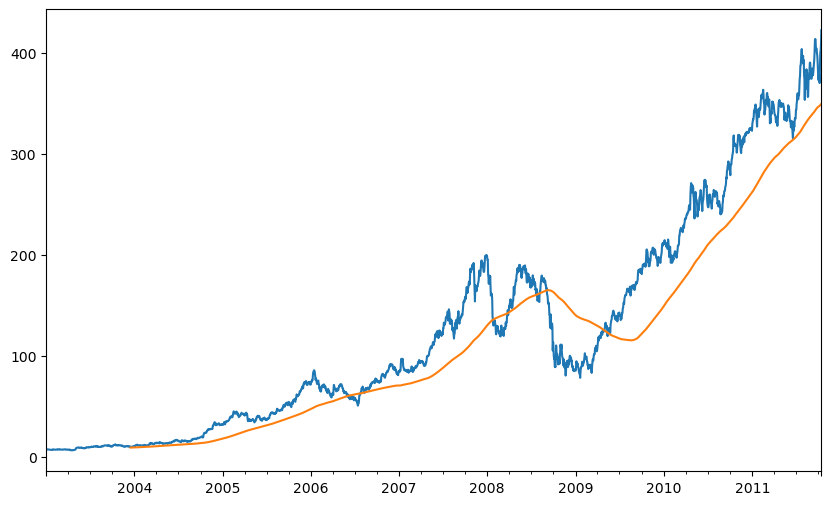

In [235]:
close_px["AAPL"].plot()
close_px["AAPL"].rolling(250).mean().plot()


The expression `rolling(250)` is similar in behavior to groupby, but instead of grouping, it creates an object that enables grouping over a 250-day sliding window. So here we have the 250-day moving window average of Apple's stock price.

By default, `rolling` functions require all of the values in the window to be `non-NA`. This behavior can be changed to account for missing data and, in particular, the fact that you will have fewer than window periods of data at the beginning of the time series (see Apple 250-day daily return standard deviation):

In [242]:
close_px_all["AAPL"].resample('B').asfreq() # with 78 nan values

2003-01-02      7.40
2003-01-03      7.45
2003-01-06      7.45
2003-01-07      7.43
2003-01-08      7.28
               ...  
2011-10-10    388.81
2011-10-11    400.29
2011-10-12    402.19
2011-10-13    408.43
2011-10-14    422.00
Freq: B, Name: AAPL, Length: 2292, dtype: float64

In [243]:
close_px_all["AAPL"].resample('B').asfreq().isna().sum()

78

In [244]:

# Creating a sample DataFrame
data = {'A': [1, 2, np.nan, 4], 'B': [5, np.nan, 7, 8], 'C': [9, 10, 11, np.nan]}
df = pd.DataFrame(data)

# Computing the mean of a DataFrame column, ignoring NaN values
mean_column_A = df['A'].mean(skipna=True)
print("Mean of column A:", mean_column_A)

# Alternatively, you can directly use the skipna parameter within the mean() method.
mean_column_B = df['B'].mean(skipna=True)
print("Mean of column B:", mean_column_B)


Mean of column A: 2.3333333333333335
Mean of column B: 6.666666666666667


c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\matplotlib\axis.py:1484: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return self.major.locator()
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\matplotlib\axis.py:1484: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return self.major.loca

<Axes: >

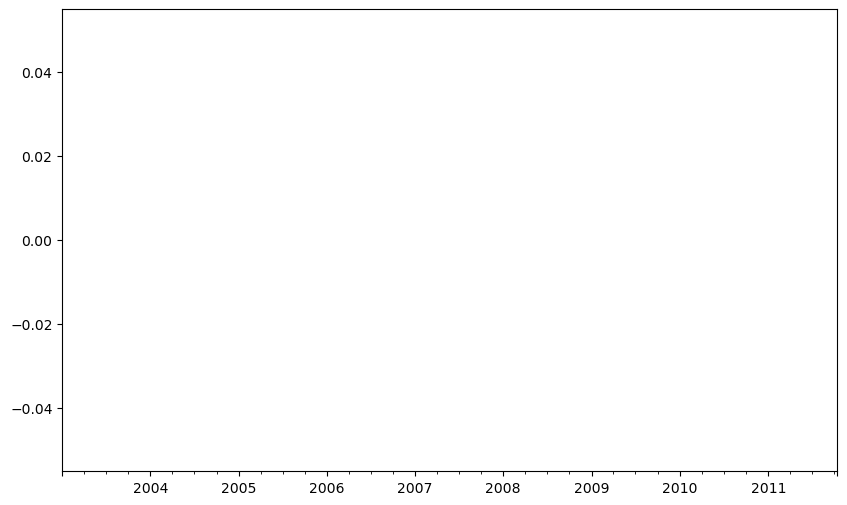

In [241]:
# 
close_px_all["AAPL"].resample('B').asfreq().rolling(250).mean().plot() # with na values, no mean will be computeed. 
# if reaplce mean() by mean(skipna=True) still not working

In [236]:
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2292 entries, 2003-01-02 to 2011-10-14
Freq: B
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2292 non-null   float64
 1   MSFT    2292 non-null   float64
 2   XOM     2292 non-null   float64
dtypes: float64(3)
memory usage: 71.6 KB


In [245]:
close_px["AAPL"].pct_change()

2003-01-02         NaN
2003-01-03    0.006757
2003-01-06    0.000000
2003-01-07   -0.002685
2003-01-08   -0.020188
                ...   
2011-10-10    0.051406
2011-10-11    0.029526
2011-10-12    0.004747
2011-10-13    0.015515
2011-10-14    0.033225
Freq: B, Name: AAPL, Length: 2292, dtype: float64

In [246]:
# checking total number of na values
close_px["AAPL"].pct_change().isna().sum() 

1

In [248]:

std250 = close_px["AAPL"].pct_change().rolling(250, min_periods=10).std()
std250[0:12]


2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15         NaN
2003-01-16    0.009628
2003-01-17    0.013818
Freq: B, Name: AAPL, dtype: float64

c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\matplotlib\axis.py:1484: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return self.major.locator()
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\matplotlib\axis.py:1484: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return self.major.loca

<Axes: >

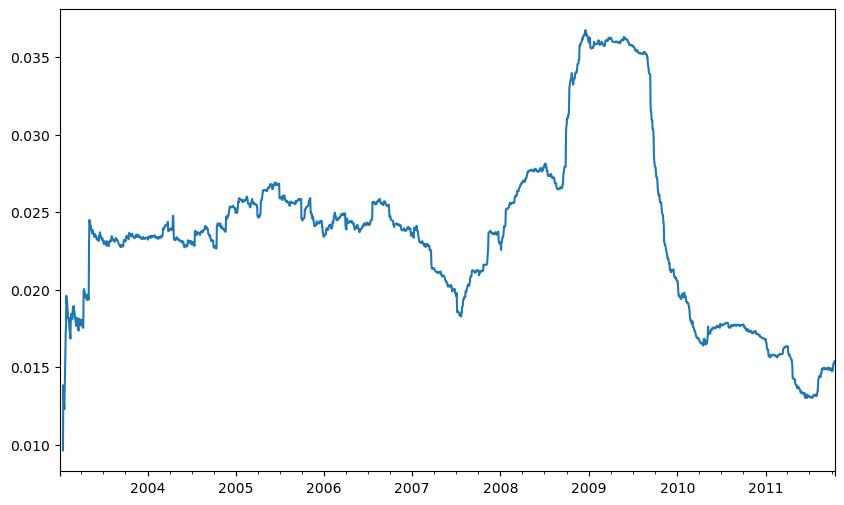

In [249]:
plt.figure()
std250.plot()

To compute an expanding window mean, use the `expanding` operator instead of `rolling`. The expanding mean starts the time window from the same point as the rolling window and increases the size of the window until it encompasses the whole series. An expanding window mean on the std250 time series looks like this:

In [251]:
expanding_mean = std250.expanding().mean() 
#expanding(min_periods=1,  axis=0)
#example ts.expanding().sum(): computer cumulative sum of ts

Calling a moving window function on a DataFrame applies the transformation to each column (see Stock prices 60-day moving average (log y-axis)):

c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = sel

<Axes: >

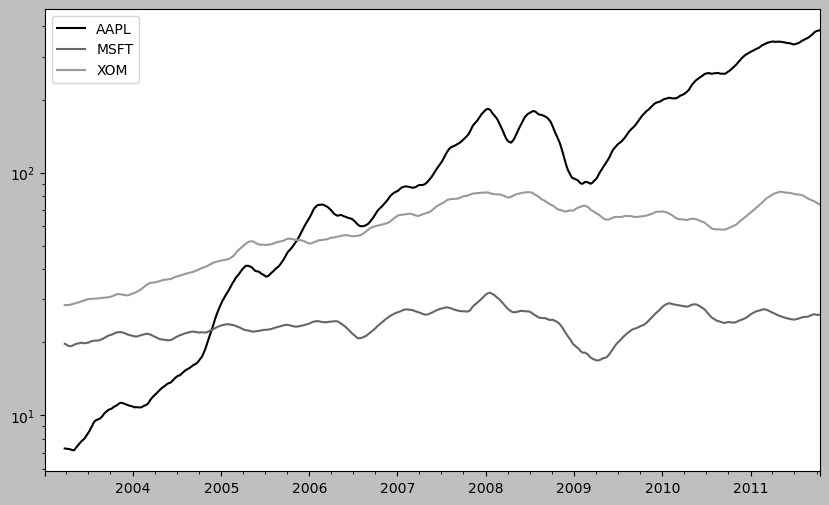

In [253]:
plt.figure()
plt.style.use('grayscale')
close_px.rolling(60).mean().plot(logy=True)

The `rolling` function also accepts a string indicating a fixed-size time offset rolling() in moving window functions rather than a set number of periods. Using this notation can be useful for irregular time series. These are the same strings that you can pass to resample. For example, we could compute a 20-day rolling mean like so:

In [254]:
close_px.rolling("20D").mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### Exponentially Weighted Functions
An alternative to using a fixed window size with equally weighted observations is to specify a constant decay factor to give more weight to more recent observations. There are a couple of ways to specify the decay factor. A popular one is using a span, which makes the result comparable to a simple moving window function with window size equal to the span.

Since an exponentially weighted statistic places more weight on more recent observations, it “adapts” faster to changes compared with the equal-weighted version.

`pandas` has the `ewm` operator (which stands for exponentially weighted moving) to go along with `rolling` and `expanding`. Here’s an example comparing a 30-day moving average of Apple’s stock price with an exponentially weighted (EW) moving average with `span=60` (see Simple moving average versus exponentially weighted):

c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\matplotlib\axis.py:1484: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return self.major.locator()
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\matplotlib\axis.py:1484: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return self.major.loca

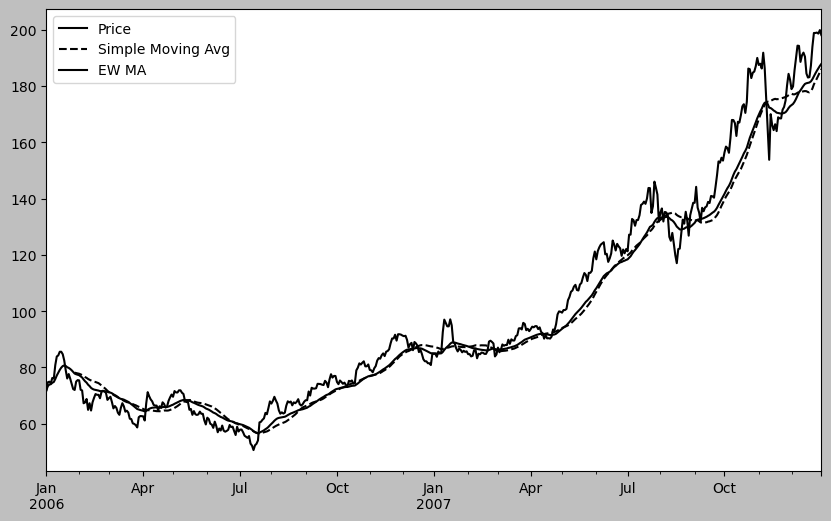

In [257]:
plt.figure()
aapl_px = close_px["AAPL"]["2006":"2007"]

ma30 = aapl_px.rolling(30, min_periods=20).mean()
ewma30 = aapl_px.ewm(span=30).mean()

aapl_px.plot(style="k-", label="Price")
ma30.plot(style="k--", label="Simple Moving Avg")
ewma30.plot(style="k-", label="EW MA")
plt.legend()

In [258]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

### Binary Moving Window Functions
Some statistical operators, like correlation and covariance, need to operate on two time series. As an example, financial analysts are often interested in a stock’s correlation to a benchmark index like the S&P 500. To have a look at this, we first compute the percent change for all of our time series of interest:

In [259]:
spx_px = close_px_all["SPX"]
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

After we call `rolling`, the `corr` aggregation function can then compute the rolling correlation with spx_rets 

c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\matplotlib\axis.py:1484: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return self.major.locator()
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\matplotlib\axis.py:1484: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return self.major.loca

<Axes: >

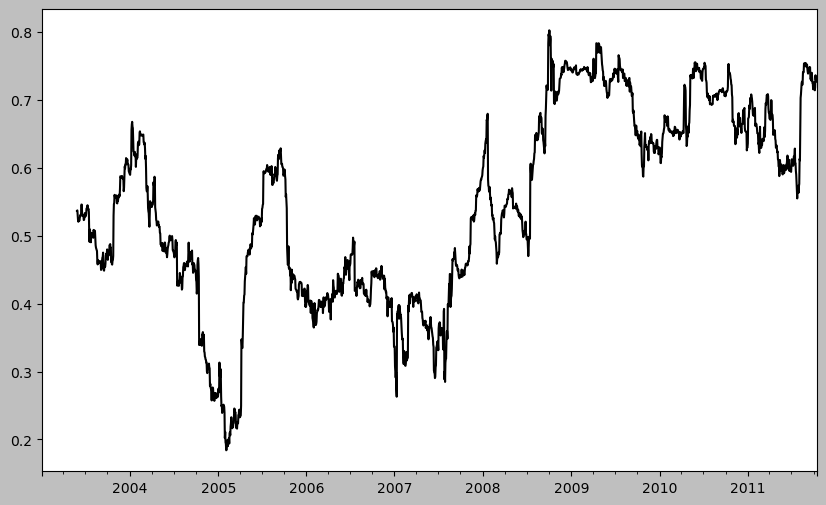

In [260]:
corr = returns["AAPL"].rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

Suppose you wanted to compute the rolling correlation of the S&P 500 index with many stocks at once.  we can compute all of the rolling correlations in one shot by calling rolling on the DataFrame and passing the spx_rets Series.

c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = sel

<Axes: >

<Figure size 1000x600 with 0 Axes>

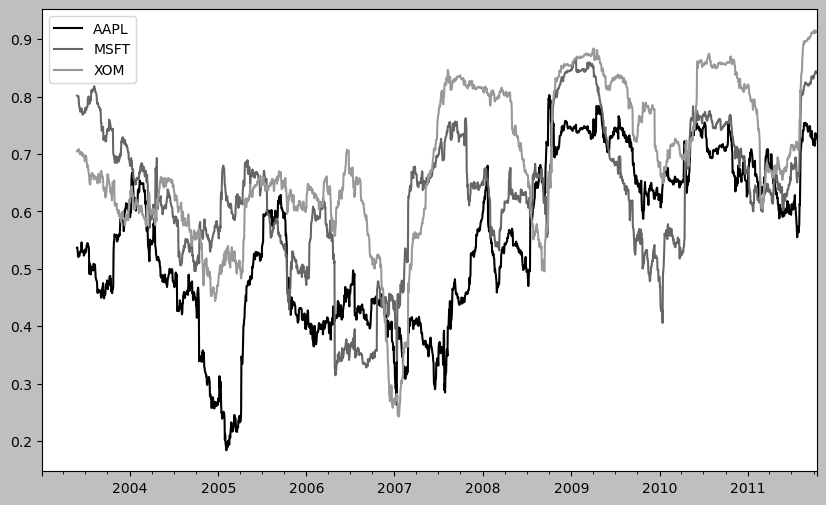

In [262]:
plt.figure()
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### User-Defined Moving Window Functions
The `apply` method on rolling and related methods provides a way to apply an array function of your own creation over a moving window. The only requirement is that the function produce a single value (a reduction) from each piece of the array. For example, while we can compute sample quantiles using `rolling(...).quantile(q)`, we might be interested in the percentile rank of a particular value over the sample. The `scipy.stats.percentileofscore` function does just this 

c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\matplotlib\axis.py:1484: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return self.major.locator()
c:\Users\Yi\anaconda3\envs\stat1010\Lib\site-packages\matplotlib\axis.py:1484: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return self.major.loca

<Axes: >

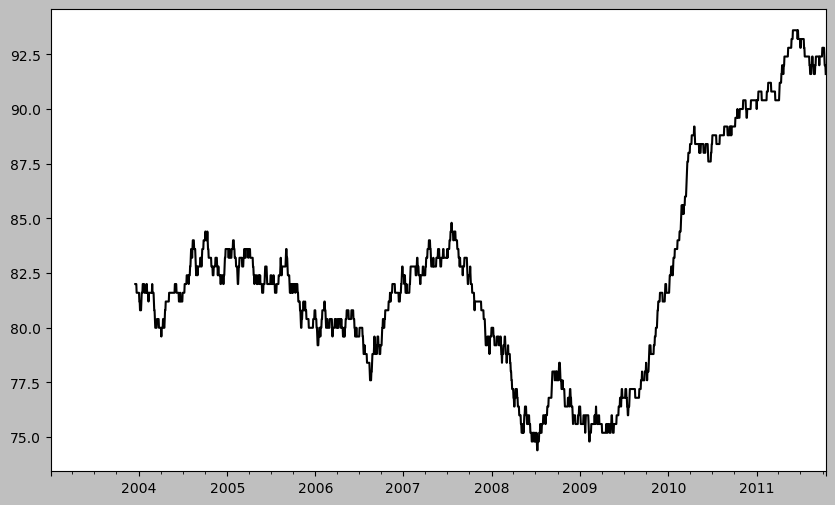

In [263]:
plt.figure()
from scipy.stats import percentileofscore
def score_at_2percent(x):
    return percentileofscore(x, 0.02) #compute the 2% percentile value in x. 

result = returns["AAPL"].rolling(250).apply(score_at_2percent)
result.plot()

In [119]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS